# What kind of Beer do you want?

# Names

- George Liu, A15836054
- Xinyao Yi, A59019592
- Yingnan Yang, A16018172

### TODO List:
- baseline model of someone else's work (add a reference)
- l1/l2 regularization term/penalty for feature selection
- add more visualization
- explain model selection more
- conclusion

Make sure to focus on model selection
explain choice of activation functions, models, train test validation split, etc.


# Abstract
For adults, beer is one of the most highly consumed beverages; wouldn't you want to find a beer that is best for you? In order to do this, we want to examine how people rate beers. This includes things such as alcohol percentage, smell, and taste. Our goal is to build a model that predicts the ratings of beer given these attributes/features, extend the model to also recommend beers based upon your own preferences to these features.

Once we filter our dataset with the necessary features, we will train a baseline linear regression model and then a more complex fully connected neural network to see how it performs, using metrics such as RMSE, MAE, and R2 correlation coefficient. These metrics will help us determine the best model, and in turn allow us to recommend the best beer for you.

# Background
Our research problem is pretty unique in that researches don’t look into a topic like this. Mostly, this is because this topic is not super important to globalization and technological improvements. There are some works that are similar in topic, but none are academic. 

One way people use this dataset is to research the types of preferences people have in beer, things like how much foam a person wants, how much alcohol percentage is in the drink, etc. This mostly is used for improving the sales of beer and crafting the best drink. <sup>[1](#preferences)</sup>

Others have used beer reviews as a way for classification, being easily able to classify a beer into some categories for ease and also increases sales. <sup>[2](#classification)</sup>

A similar drink to beer is wine, and they are experimenting with computer vision to find when the optimal time is to use the ingredients, aka harvesting the grapes. A similar application can be used on barley, the ingredient to make beer. <sup>[3](#beer)</sup>

# Problem Statement/Research Problem
We aim to suggest the best beer for you based upon common beer preferences; things such as alcohol level, appearence, bitterness, etc. In the process of doing this, we will also aim to predict ratings on a scale 1-5, based upon these preferences; which can be replicated through our model architecture (there is no randomness). This problem is both quantifiable (as our predicted ratings we can get a definite number), and also measurable, through our error metrics that we present below.

# Dataset

https://www.kaggle.com/datasets/rdoume/beerreviews
This dataset can be found above at the link provided. It around 1.5 million beer reviews, and 13 total features. Each sample will consist of something similar to the name of the drink, a few columns representing the preferences of beers like alcohol level, and then the overall review rating. For our data, we need preprocess by filtering out useless columns and also selecting columns that can easily fit into our neural network architecture (for example getting columns that are integers/floats). Additionally, we will also have to one hot encode features that are important but categorical variables, for instance beer style. We also should drop any sample that is empty in the columns that we find useful.

To create our training set and test set, we need to first extract the overall rating score from the dataset as our y values (labels). Then, we extract all the columns that we find important and use that as our X. Then we can use test_train split to get the necessary proportions for our model to be generalizable. We can also split into a validation set, because we have so much data. Something to note is that our labels (y) are on a scale from 1-5, with increments of 0.5. This will affect our model selection later.

Below, you will be able to see how we pre processed our data.

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from sklearn.tree import DecisionTreeRegressor, plot_tree

2023-03-09 22:49:35.399896: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-09 22:49:35.569021: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-09 22:49:35.569063: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-09 22:49:37.376420: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
df = pd.read_csv('beer_reviews.csv')

In [3]:
df = df.dropna()

In [4]:
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


Creating a beer dictionary to pull up the names later.


In [5]:
beer_dict = dict(zip(df['beer_beerid'],df['beer_name']))

Getting the true review score

In [6]:
y = df.loc[:, 'review_overall']

We can see that all the labels are on a scale of 1-5, incrementing by 0.5.

In [7]:
np.unique(y)

array([0. , 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

##### Checking for Bias

<AxesSubplot:xlabel='review_overall', ylabel='count'>

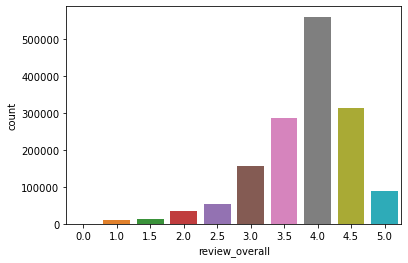

In [8]:
sns.countplot(x=df['review_overall'],data=df)

We can see our data is really skewed, most of the reviews are 4.0,4.5.

In [9]:
df = df.drop(['brewery_id','brewery_name','review_time','review_profilename', 'beer_name','review_overall'],axis=1)

Need to one hot encode beer style

In [10]:
one_hot = pd.get_dummies(df['beer_style'])
df = pd.concat([df, one_hot], axis=1)
X = df.drop('beer_style', axis=1)

Looking at key for one hot:

In [11]:
one_hot = one_hot.columns.tolist()
one_hot[:5]

['Altbier',
 'American Adjunct Lager',
 'American Amber / Red Ale',
 'American Amber / Red Lager',
 'American Barleywine']

In [12]:
X.head()

,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid,Altbier,American Adjunct Lager,American Amber / Red Ale,American Amber / Red Lager,...,Scotch Ale / Wee Heavy,Scottish Ale,Scottish Gruit / Ancient Herbed Ale,Smoked Beer,Tripel,Vienna Lager,Weizenbock,Wheatwine,Winter Warmer,Witbier
0,2.0,2.5,1.5,1.5,5.0,47986,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.5,3.0,3.0,3.0,6.2,48213,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.5,3.0,3.0,3.0,6.5,48215,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,3.5,2.5,3.0,5.0,47969,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.5,4.0,4.0,4.5,7.7,64883,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
X.dtypes

review_aroma         float64
review_appearance    float64
review_palate        float64
review_taste         float64
beer_abv             float64
                      ...   
Vienna Lager           uint8
Weizenbock             uint8
Wheatwine              uint8
Winter Warmer          uint8
Witbier                uint8
Length: 110, dtype: object

##### Checking our data for outliers:

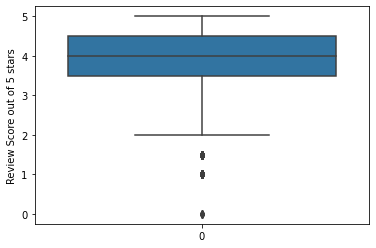

<Figure size 864x864 with 0 Axes>

In [14]:
sns.boxplot(data=y);
plt.ylabel('Review Score out of 5 stars')
plt.figure(figsize=(12,12));
plt.show()

We can see most of our beer reviews are around 4 stars, which makes sense logically. Most people when rating will just give above average if it is not exceptional or terrible. However, if a beer is terrible, then we can see some outliers in the graph. However, it seems like we don't have too many outliers, so perhaps if we decided to use regularization, we could use L2 regularization instead of L1.

##### Some Basic Model Selection

In our solution to the research problem, our dataset is huge. We have over 1.5 million samples, which means we can split our data into train, test, and validation. We don't need things like nested cross validation or k-folds, since those are techniques used when data is sparse.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [16]:
# convert everything to float for ease of use
X_train = np.array(X_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
X_val = np.array(X_val, dtype=np.float32)
y_val = np.array(y_val, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

# Proposed Solution:
We will first create a baseline decision tree model to get a feel for how it performs. We don't expect this to be great, because it will train slow compared to a neural network and is prone to overfitting since we haven't done any particular model selection on it. However, it will help determine the relationship between features and help select which features are the most important to help other models. 

From these results, we will create a fully connected neural network, which is useful because it can use backpropogation to fix previous misclassifications. This will make the model much more accurate. 

Finally, using the neural network, we will create a basic recommendation system that takes input from the user and inputs into our model to predict. We will need to add some logic to return the name of the beer that the model prediction corresponds to.

# Evaluation Metrics:

Our model isn't doing any classification, we already know all drinks that we predict are going to be beers. That means things like confusion matricies, F1 score, precision, etc. are not applicable. Instead, we would have to use things like Mean Absolute Error, Root Mean Squared Error, and R2 correlation coefficients to evaluate our models. 

We will mostly evalute on mean absolute error, because of our prediction rating system. When we make a mistake, we only care how far it is from the true predicted value, not the direction it is in. Therefore, to compute this distance MAE is the best choice.

# TODO:

- Add baseline model made by another person

- TA: we found baseline code, but not sure if we are supposed to copy paste it directly, or should we just post a reference?

# Preliminary Results:

Here, we will train our baseline decision tree and see the results.


##### A little behind Model Selection
Reasoning behind selecting tree as our baseline model: At this point, we don't know too much about our data; whether there are outliers, missing values, etc. We also have both categorical as well as numerical data. Decision trees can handle all these conditions while also not assuming anything about our data (unlike OLS implementation) and training very quickly. In addition, decision trees allow us to quickly find the most important features, which is information we can use later.

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [18]:
model = DecisionTreeRegressor(max_depth=3)

In [19]:
model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [20]:
feature_importances = model.feature_importances_
feature_importances = sorted(zip(X.columns, feature_importances))
max(feature_importances)

('review_taste', 0.985284179045517)

We can see in our model, the most important feature is the taste. However, it is taking way too much percentage, the other columns should have some weight. This is something to consider when we implement our further models.

In [21]:
y_pred = model.predict(X_val)

In [22]:
y_pred[:5]

array([4.2398467 , 3.6422907 , 3.6422907 , 4.02011732, 4.02011732])

In [23]:
y_test[:5]

array([4. , 4.5, 5. , 4. , 4.5], dtype=float32)

In [24]:
mae = mean_absolute_error(y_val, y_pred)
mae

0.321302087303361

In [25]:
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
rmse

0.4377291495473541

In [26]:
r2 = r2_score(y_val, y_pred)
r2

0.6262170239566527

As we can see, our own baseline decision tree doesn't perform great, which is why we want to see if we can improve it using a grid search before moving onto a different model.

#### Randomized Grid Search

Our dataset is huge, and we don't want to be training all day, so using a randomized grid search will sacrifice possible performance for speed, which is something we are willing to do.

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [28]:
param_dist = {"max_depth": [3, 5, 7, 10],
               "min_samples_split": randint(2, 20),
               "min_samples_leaf": randint(1, 20)}

In [29]:
mode = "none"

In [30]:
if mode == "search":
    model = DecisionTreeRegressor()
    random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, random_state=42, n_jobs=-1)
    new_model = random_search.fit(X_train, y_train)
    print('Best Score: %s' % new_model.best_score_)
    print('Best Hyperparameters: %s' % new_model.best_params_)

In [31]:
best_score = 0.677181106120889
best_depth = 10
best_min_samples_leaf = 12
best_min_samples_split = 7

In [32]:
tree_model = DecisionTreeRegressor(max_depth=best_depth, min_samples_leaf=best_min_samples_leaf, min_samples_split=best_min_samples_split)
tree_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=12, min_samples_split=7)

In [33]:
feature_importances =tree_model.feature_importances_
feature_importances = sorted(zip(X.columns, feature_importances))
max(feature_importances)

('review_taste', 0.9154830223114546)

In [34]:
y_pred = tree_model.predict(X_test)

In [35]:
mae = mean_absolute_error(y_test, y_pred)
mae

0.30776884572769525

In [36]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

0.4070918625370479

In [37]:
r2 = r2_score(y_test, y_pred)
r2

0.6782295010853543

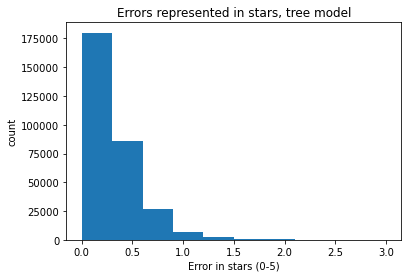

In [38]:
abs_error = np.abs(np.array(y_test) - np.array(y_pred).flatten())
plt.hist(abs_error, bins=10, range=(0,3))
plt.ylabel('count')
plt.xlabel('Error in stars (0-5)')
plt.title('Errors represented in stars, tree model')
plt.show()

After running our grid search, we actually can see our model performed about 2% better, which is not bad since we only need to serach throught the grid once. Additionally, we can see most of our errors are actually pretty close to 0-0.5 stars, which is really good. Overall, decision trees are a pretty good model choice on this dataset, because it can model nonlinear relationships quite easily since it is not a parametric model.

# Ethics/Privacy:

There is definitely bias/imbalanced data in this dataset. We say this because as humans, we don't really rate things 0 or 5 on a 0-5 scale. Unless something is super bad or super good, we probably would rate it in between something like 3.5 to 4.5. This can severely affect our model predictions, so we need to take this into account.

Further, we need to remove the names of the people that gave the reviews for the beers to preserve anonminity.

Additionally, the ratings of some samples may occur when a person is already drunk, causing them to rate much higher or lower than if they were sober. It may also depend on how much fun they had while drunk. This also is sampling error, which we can't do much about.

# Team Expectations

* Be available on the weekends to work together if neccessary, otherwise individually complete assigned work during weekday
* Inform all team members through group chat on updates/something is pushed to github
* Finish all required parts at least 2 days before deadline is due

# Project Timeline Proposal


| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 2/16  |  1 PM |  Brainstorm topics/questions (all)  | Determine best form of communication; Discuss and decide on final project topic; discuss hypothesis; begin background research | 
| 2/17  |  10 AM |  Do background research on topic and come up with basic model (George) | Discuss ideal dataset(s) and ethics; draft project proposal | 
| 2/20  | 10 PM  | Edit, finalize, and submit proposal; Search for datasets (All)  | Assign group members to lead each specific part   |
| 3/1  | 6 PM  | Begin Neural Network architecture design/programming(George) | Discuss Analysis Plan   |
| 3/4 | 12 PM  | Write recommendation system(George) | Discuss/edit project code; Complete project |
| 3/12  | 12 PM  | Draft results/conclusion/discussion (Xinyao/Yingnan)| Discuss/edit full project |
| 3/19  | Before 11:59 PM  | NA | Turn in Final Project  |

# Footnotes

<a name="preferences">1</a>: AI of Things, one Telefonica Tech´s business unit. “The Use of AI and Machine Learning in the Beer Industry.” Think Big/Business, 18 June 2021, https://business.blogthinkbig.com/the-use-of-ai-and-machine-learning-in-the-beer-industry/. <br>

<a name="classification">2</a>: da Costa, Nattane Luíza, et al. “A Review on the Application of Chemometrics and Machine Learning Algorithms to Evaluate Beer Authentication - Food Analytical Methods.” SpringerLink, Springer US, 26 Sept. 2020, https://link.springer.com/article/10.1007/s12161-020-01864-7. 


<a name="beer">3</a>: Editor, MathWorks. “Making Better Beer and Wine with Data and Machine Learning.” Medium, MathWorks, 23 Sept. 2020, https://medium.com/mathworks/making-better-beer-and-wine-with-data-and-machine-learning-dd04459f53b7. 

# Fully Connected Neural Network

In [39]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras import regularizers
from sklearn.utils.class_weight import compute_class_weight

If you look at the data section, we found that our ratings/classes are very imbalanced; we need to give the ratings that appear less frequently to have more weight.

In [40]:
class_weights = dict(enumerate(compute_class_weight('balanced', np.unique(y_train), y_train)))
class_weights

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass classes=[0.  1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ], y=[4.  3.5 3.5 ... 4.5 3.  4. ] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


{0: 18221.72,
 1: 14.845787844223562,
 2: 12.497750342935529,
 3: 4.252443407234539,
 4: 2.7908898759381224,
 5: 0.9719494761996202,
 6: 0.5301419203174732,
 7: 0.2710339370284871,
 8: 0.48394320710920363,
 9: 1.7006122372792774}

In [41]:
np.unique(y_train)

array([0. , 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ], dtype=float32)

In [42]:
model = Sequential()
model.add(Dense(64, input_shape=(110,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

2023-03-09 22:50:01.433738: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-09 22:50:01.433788: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-09 22:50:01.433841: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (dsmlp-jupyter-g9liu): /proc/driver/nvidia/version does not exist
2023-03-09 22:50:01.434165: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Model Selection on Neural Network

Our overall neural network design is a recurrent neural network (sequential). We chose this because of its training efficiency as well as its ability to learn from previous mistakes. The back propogation allows the model to adjust the weights during each iteration. Finally, RNN is super flexible when it comes to input and output shapes. We need this, because we have one hot encoded categorical data; meaning our input is pretty large (hence the 110).

Why we choose to use l1 as our regularizer:
- actually allows features to have a weight of 0: features like beer_id are important for identification, but should not contribute to the model prediction
- robust to outliers compared to l2; after looking at our data, we have some outliers so we want to prevent the model from severely fitting towards those datapoints.

From class, we learned that having a low number of hidden layers usually makes the model too simple to learn nonlinear relationships. We do not expect our relationships between all the features to be completely linear, so having a couple hidden layers should allow our data to learn complex relationships without overfitting.

Since we are dealing with nonlinear relationships, we should use nonlinear activation functions. Relu is simple and efficient, and allows there to be a gradient everywhere so we can use backpropagation and update weights. In some of our hidden layers, we also use tanh to introduce further nonlinearity.

Note: We tried implementing regularization as well as dropout, but because our model not complex enough/fitting well on the training data, it doesn't make sense to implement these techniques because they help generalize the model better, and we don't need that.


In [43]:
mode = 'none'
save = 'no'

In [44]:
# Compile the model
if mode == 'test':
    optimizer = Adam(learning_rate=0.01)
    #model.compile(optimizer=optimizer, loss='mean_absolute_error')
    model.compile(optimizer=optimizer, loss='mean_absolute_error')
    model.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_val, y_val), class_weight=class_weights)
    if save== 'yes':
        model.save("beer_nn")
else:
    model = load_model('beer_nn')

In [45]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)

9491/9491 [==============================] - 9s 894us/step


In [46]:
mae = mean_absolute_error(y_test, y_pred)
mae

0.63363636

In [47]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

0.7861386

In [48]:
r2 = r2_score(y_test, y_pred)
r2

-0.19994015184056413

In [49]:
abs_error = np.abs(np.array(y_test) - np.array(y_pred).flatten())

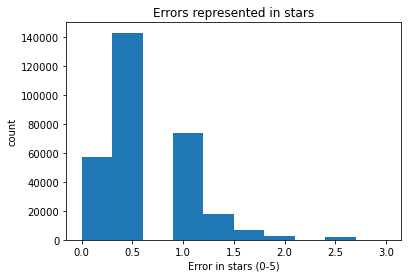

In [50]:
plt.hist(abs_error, bins=10, range=(0,3))
plt.ylabel('count')
plt.xlabel('Error in stars (0-5)')
plt.title('Errors represented in stars')
plt.show()

We can see our neural network model performs actually worse than our tree model. This probably is due to high overfitting and because our data is nonlinear. As a result, the tree is a much better model since nonlinearity doesn't affect its decisions while our neural network does.

Now, let's see what our model determines the most important feature is at each layer.

In [51]:
def get_most_important_feature(model,layer:int):
    weights = model.layers[layer].get_weights()[0]
    most_important_features = np.argmax(weights, axis=0)
    return X.columns[np.argmax(most_important_features)], np.max(most_important_features)

In [52]:
feature, _ = get_most_important_feature(model=model,layer=0)
print("The most heavily weighted feature is", feature)

The most heavily weighted feature is Belgian Pale Ale


In [53]:
feature, _ = get_most_important_feature(model=model,layer=1)
print("The most heavily weighted feature is", feature)

The most heavily weighted feature is American Stout


In [54]:
feature, weight = get_most_important_feature(model=model,layer=2)
print("The most heavily weighted feature at is", feature,'; the weight is', weight)

The most heavily weighted feature at is beer_abv ; the weight is 28


We can see at the beginning, something like 'Dunkelweitzen' is the most important feature due to not fully being trained, but by the end, 'beer_abv' is the most important at 28%. This makes sense, because being the alcohol level logically definitely plays apart on your rating (a person will rate it higher/lower depending on if they want to be drunk or not). Additionally, the weight percentage is also more logical than our baseline, where its most heavy weight was 98%. 

# Building Recommendation System From Model 

Choosing to build recommendation system based on our most heavily weighted feature; and predicting from our best model (the tree after grid search).

In [55]:
feature_means = X.mean()

In [56]:
abv_input = float(input('What alcohol percentage (0-100) do you want? '))

What alcohol percentage (0-100) do you want? 4


In [57]:
X_train.shape

(911086, 110)

In [58]:
feature_means['beer_abv'] = abv_input
user_input = feature_means.values.reshape(1, -1)
beer_ratings = tree_model.predict(user_input)[0]
print("Predicted beer rating for beers where it has",abv_input,"% abv level is ",beer_ratings)

Predicted beer rating for beers where it has 4.0 % abv level is  4.1202360876897135


In [59]:
df['rating_difference'] = abs(y - beer_ratings)
df = df.sort_values('rating_difference')
top_ten=df[:10]
df_closest = top_ten.iloc[(top_ten['beer_abv']-abv_input).abs().argsort()[:1]]
beer_id = df_closest['beer_beerid'].values[0]
beer_name = beer_dict.get(beer_id)
print("You should try",beer_name)

You should try Staropramen Lager


/tmp/ipykernel_4365/3238401176.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  df_closest = top_ten.iloc[(top_ten['beer_abv']-abv_input).abs().argsort()[:1]]


# Conclusion